### Домашнее задание
При фиксированном seed=21  поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, 
tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции Растригина от значения параметра.

f(x) = An + E[x^2 - A cos(2px)],
  где A = 10 , x E[-5.12, 5.12].  Глобальный минимум в точке x = 0, where f(x) = 0
  
result = differential_evolution(rastrigin, bounds, seed = 21)

In [1]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def rastrigin(*X, **kwargs):
    A = kwargs.get('A', 10)
    return A + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])

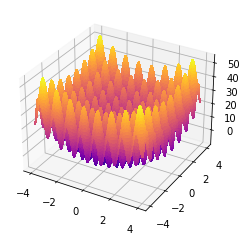

In [11]:
if __name__ == '__main__':
    X = np.linspace(-4, 4, 200)    
    Y = np.linspace(-4, 4, 200)
    X, Y = np.meshgrid(X, Y)

    Z = rastrigin(X, Y, A=10)

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.plasma, linewidth=0, antialiased=False)


In [12]:
from scipy.optimize import dual_annealing

In [29]:
bounds = [(-10, 10), (-10, 10), (-10, 10), (-10, 10)]
rastrig = lambda x: np.sum(x*x - 10*np.cos(2*np.pi*x)) + 10*np.size(x)


In [30]:
lw = [-5.12] * 10
up = [5.12] * 10
ret = dual_annealing(rastrig, bounds=list(zip(lw, up)), seed=21)
ret.x

array([-6.55774405e-10, -7.84634665e-10, -6.21592078e-09, -5.01388479e-09,
       -3.94946307e-09, -4.86738555e-09, -1.57570064e-10, -1.61449803e-11,
       -6.42140318e-09, -6.35212717e-09])

In [31]:
from scipy.optimize import differential_evolution


import numpy as np
def rastrigin(*X, **kwargs):
    A = kwargs.get('A', 10)
    return A + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])


bounds = [(-5, 5), (-5, 5)]

result = differential_evolution(rastrig, bounds, seed=21, recombination=0.7, tol=0.1)

result

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 68
 success: True
       x: array([-2.47499521e-09, -6.55134280e-10])

In [33]:
result = differential_evolution(rastrig, bounds, seed=21, popsize=0.7, tol=0.1)

result

     fun: 0.9949590570933005
     jac: array([ 7.10542736e-07, -3.55271366e-07])
 message: 'Optimization terminated successfully.'
    nfev: 108
     nit: 17
 success: True
       x: array([-3.23201498e-09,  9.94958632e-01])

In [34]:
result = differential_evolution(rastrig, bounds, seed=21, popsize=0.7, mutation=[0.1, 1.9])

result

     fun: 4.974790247647389
     jac: array([-3.55271370e-07,  1.77635683e-07])
 message: 'Optimization terminated successfully.'
    nfev: 103
     nit: 16
 success: True
       x: array([ 1.98991223, -0.99495864])

In [35]:
result = differential_evolution(rastrig, bounds, seed=21, popsize=0.7, updating='deferred')

result

     fun: 1.9899181141865938
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 158
     nit: 27
 success: True
       x: array([-0.99495864, -0.99495864])

In [36]:
result = differential_evolution(rastrig, bounds, seed=21, popsize=0.7, updating='immediate')

result

     fun: 0.9949590570934319
     jac: array([-8.17124146e-06, -7.10542732e-07])
 message: 'Optimization terminated successfully.'
    nfev: 123
     nit: 20
 success: True
       x: array([-2.58454700e-08,  9.94958631e-01])

In [37]:
result = differential_evolution(rastrig, bounds, seed=21, recombination=0.3, updating='deferred')

result

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 2583
     nit: 85
 success: True
       x: array([1.87390103e-10, 1.32368672e-09])